# Trabalho Final

In [57]:
# Importação das libs necessárias
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv


## Carga e tratamento dos dados

In [2]:
df_lithology = pd.read_csv('datasets/lithology.csv', sep=';')


In [24]:
# Para mostrar todas as colunas
pd.set_option("display.max_columns", None)

df_lithology

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded,FORCE_2020_LITHOFACIES_LITHOLOGY_IDX
0,494.5280,437641.96875,6470972.5,-469.501831,19.480835,-999.0,1.611410,1.798681,1.884186,80.200851,-999.0,20.915468,161.131180,24.612379,17.5,34.636410,1.980835,-0.574928,-999.0,-999.0,65000.0,24.735691,0.314847,0.150172,-0.000000,-0.000000,-0.000000,0.000,0.000000,6,68,2
1,494.6800,437641.96875,6470972.5,-469.653809,19.468800,-999.0,1.618070,1.795641,1.889794,79.262886,-999.0,19.383013,160.603470,23.895531,17.5,34.636410,1.968800,-0.570188,-999.0,-999.0,65000.0,24.492376,0.318528,0.148269,0.527710,-0.005608,0.937965,0.152,-0.243315,6,68,2
2,494.8320,437641.96875,6470972.5,-469.805786,19.468800,-999.0,1.626459,1.800733,1.896523,74.821999,-999.0,22.591518,160.173615,23.916357,17.5,34.779556,1.968800,-0.574245,-999.0,-999.0,65000.0,24.202299,0.322946,0.139258,0.429855,-0.006729,4.440887,0.152,-0.290077,6,68,2
3,494.9840,437641.96875,6470972.5,-469.957794,19.459282,-999.0,1.621594,1.801517,1.891913,72.878922,-999.0,32.191910,160.149429,23.793688,17.5,39.965164,1.959282,-0.586315,-999.0,-999.0,65000.0,24.400797,0.319919,0.135315,0.024185,0.004610,1.943077,0.152,0.198498,6,68,2
4,495.1360,437641.96875,6470972.5,-470.109772,19.453100,-999.0,1.602679,1.795299,1.880034,71.729141,-999.0,38.495632,160.128342,24.104078,17.5,57.483765,1.953100,-0.597914,-999.0,-999.0,65000.0,24.916765,0.312121,0.132982,0.021088,0.011879,1.149780,0.152,0.515968,6,68,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,3169.3124,444920.37500,6421578.0,-999.000000,8.423170,-999.0,-999.000000,-999.000000,2.527984,77.654900,-999.0,4.586425,68.519517,-999.000000,8.5,27.674368,-0.076830,-0.001763,-999.0,-999.0,30000.0,3.853715,0.906928,0.188539,5.709644,-0.050081,-15.087708,0.152,-1.235199,11,7,0
1170507,3169.4644,444920.37500,6421578.0,-999.000000,8.379244,-999.0,-999.000000,-999.000000,2.537613,75.363937,-999.0,7.019858,67.485402,-999.000000,8.5,28.024338,-0.120756,-0.007600,-999.0,-999.0,65030.0,3.621808,0.924426,0.181304,1.034114,-0.009629,2.290962,0.152,-0.231906,11,7,1
1170508,3169.6164,444920.37500,6421578.0,-999.000000,8.350248,-999.0,-999.000000,-999.000000,2.491860,66.452843,-999.0,9.049782,72.579981,-999.000000,8.5,28.091282,-0.149752,-0.018297,-999.0,-999.0,65030.0,4.739676,0.841284,0.153161,-5.094579,0.045753,8.911095,0.152,1.117868,11,7,1
1170509,3169.7684,444920.37500,6421578.0,-999.000000,8.313779,-999.0,-999.000000,-999.000000,2.447539,55.784817,-999.0,8.903917,77.981748,-999.000000,8.5,28.019775,-0.186221,-0.011438,-999.0,-999.0,65030.0,5.862411,0.760743,0.119469,-5.401767,0.044321,10.668026,0.152,1.122734,11,7,1


In [4]:
# Lista de colunas existentes
df_lithology.info()

# Selecionando as features
category_columns = ['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'CALI', 'RSHA', 'RMED', 'RDEP',
       'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS', 'ROP', 'DCAL', 'DRHO',
       'MUDWEIGHT', 'RMIC', 'Carbon_Index',
       'Normalized_RHOB', 'Normalized_GR', 'Delta_DTC', 'Delta_RHOB',
       'Delta_GR', 'Delta_DEPTH_MD', 'Delta_Carbon_Index', 'GROUP_encoded',
       'FORMATION_encoded']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   DEPTH_MD                          1170511 non-null  float64
 1   X_LOC                             1170511 non-null  float64
 2   Y_LOC                             1170511 non-null  float64
 3   Z_LOC                             1170511 non-null  float64
 4   CALI                              1170511 non-null  float64
 5   RSHA                              1170511 non-null  float64
 6   RMED                              1170511 non-null  float64
 7   RDEP                              1170511 non-null  float64
 8   RHOB                              1170511 non-null  float64
 9   GR                                1170511 non-null  float64
 10  NPHI                              1170511 non-null  float64
 11  PEF                               117

In [26]:
# Descrevendo os dados
df_lithology.describe().round(decimals=1)

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DCAL,DRHO,MUDWEIGHT,RMIC,FORCE_2020_LITHOFACIES_LITHOLOGY,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded,FORCE_2020_LITHOFACIES_LITHOLOGY_IDX
count,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0,1170511.0
mean,2184.1,485629.2,6679844.6,-2128.0,-62.8,-455.0,-28.5,1.2,-135.7,70.9,-345.5,-422.1,78.4,-217.2,11.9,-479.5,-87.3,-161.2,-728.8,-847.5,61386.0,-127.9,-137.2,0.3,-33.0,-137.7,-0.0,0.2,-137.7,6.6,41.3,2.0
std,997.2,34451.7,129079.7,972.6,266.7,508.7,188.0,149.6,345.1,34.2,475.4,497.2,204.5,470.2,3.1,1184.8,284.2,367.5,444.1,361.7,13891.7,348.3,344.5,0.2,178.7,344.4,3.5,0.3,344.4,3.1,22.8,1.5
min,136.1,426898.8,6406641.0,-5395.6,-999.0,-999.0,-999.0,-999.0,-999.0,0.1,-999.0,-999.0,-999.0,-999.0,6.0,-999.0,-999.0,-999.0,-999.0,-999.0,30000.0,-999.0,-999.0,0.0,-999.0,-999.0,-268.5,0.0,-999.0,0.0,-1.0,0.0
25%,1418.6,454801.8,6591139.8,-2804.6,8.9,-999.0,0.9,0.9,2.0,47.6,-999.0,-999.0,85.3,-999.0,8.5,-999.0,-0.1,-0.0,-999.0,-999.0,65000.0,2.9,0.4,0.1,-0.7,-0.0,-1.4,0.2,-0.5,5.0,24.0,1.0
50%,2076.6,476907.8,6732205.0,-2030.5,12.4,0.6,1.4,1.4,2.2,68.4,0.2,2.9,106.9,40.4,12.2,-999.0,0.4,-0.0,-999.0,-999.0,65000.0,7.7,0.5,0.2,-0.0,-0.0,-0.0,0.2,-0.1,6.0,39.0,2.0
75%,2864.4,520153.2,6784877.5,-1373.3,15.7,1.5,2.6,2.5,2.5,89.0,0.4,4.6,140.1,70.4,12.2,15.0,1.7,0.0,0.1,-999.0,65000.0,15.5,0.7,0.4,0.6,0.0,1.4,0.2,0.2,9.0,66.0,2.0
max,5436.6,572632.8,6856661.0,-111.1,28.3,2193.9,1988.6,1999.9,3.5,1077.0,1.0,383.1,1555.3,526.5,26.0,47015.1,8.0,1.5,185.7,10000.0,99000.0,157.0,1.0,1.0,759.6,1.1,266.5,269.3,110.7,13.0,69.0,11.0


Identificado que muitas colunas possuem valores -999 como mínimo. É evidente que são valores ausentes. Pela falta de conhecimento sobre os termos e comportamento adequado, é muito difícil identificar como substituir esses valores. Inicialmente vamos deixar a rede se virar.
Me incomoda um pouco o fato de que o RMIC possui mais que 75% do valores ausentes.

In [40]:
# Isso aqui trava o jupyter - Então não precisa pois temos as infos necessárias no describe acima. Faltando só os outliers.

#for column in df_lithology.columns:
#    df_lithology[column].plot.box()
#    plt.show()

# Mas vamos aproveitar e identificar qual o volume de registros ausentes nas colunas:
absent_data = []
for column in df_lithology.columns:
    qtd = len(df_lithology[df_lithology[column] == -999])
    absent_data.append([column, qtd, round((qtd / len(df_lithology)),2)])

pd.DataFrame(absent_data, columns=['column', 'absent', 'ratio']).sort_values('ratio', ascending=False)


,column,absent,ratio
19,RMIC,994351,0.85
18,MUDWEIGHT,854360,0.73
15,ROP,635440,0.54
5,RSHA,539861,0.46
11,PEF,498819,0.43
10,NPHI,405102,0.35
13,SP,306838,0.26
17,DRHO,188895,0.16
25,Delta_RHOB,161385,0.14
22,Normalized_RHOB,161269,0.14


In [7]:
# Conferindo as opções de cada y
df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY'].value_counts()

65000.0    720803
30000.0    168937
65030.0    150455
70000.0     56320
80000.0     33329
99000.0     15245
70032.0     10513
88000.0      8213
90000.0      3820
74000.0      1688
86000.0      1085
93000.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

O que podemos notar aqui é uma altíssima concentração no 65000. Vamos analisar como isso vai influenciar a rede:

In [8]:
# Lendo o hidden e checando as colunas
df_hidden = pd.read_csv('datasets/hidden.csv', sep=';')
df_hidden


,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,Carbon_Index,Normalized_RHOB,Normalized_GR,Delta_DTC,Delta_RHOB,Delta_GR,Delta_DEPTH_MD,Delta_Carbon_Index,GROUP_encoded,FORMATION_encoded
0,1518.2800,433906.7500,6460000.5,-1493.241821,15.506232,-999.0,-999.000000,0.878615,-999.0,103.451515,...,-999.0,-999.0,0.229715,-0.000000,-999.0,-0.000000,0.000,-999.0,5,51
1,1518.4320,433906.7500,6460000.5,-1493.393799,18.524611,-999.0,-999.000000,0.874237,-999.0,94.124893,...,-999.0,-999.0,0.206369,1.616959,-999.0,9.326622,0.152,-999.0,5,51
2,1518.5840,433906.7500,6460000.5,-1493.545776,18.855669,-999.0,-999.000000,0.869858,-999.0,93.586487,...,-999.0,-999.0,0.205021,0.131363,-999.0,0.538406,0.152,-999.0,5,51
3,1518.7360,433906.7500,6460000.5,-1493.697754,19.163353,-999.0,-999.000000,0.865479,-999.0,91.113373,...,-999.0,-999.0,0.198831,1.637512,-999.0,2.473114,0.152,-999.0,5,51
4,1518.8880,433906.7500,6460000.5,-1493.849609,18.489744,-999.0,0.849849,0.863804,-999.0,100.228333,...,-999.0,-999.0,0.221647,0.819153,-999.0,-9.114960,0.152,-999.0,5,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,2973.2988,536096.0625,6793022.0,-2943.444580,8.276272,-999.0,2.820439,3.158570,-999.0,90.720284,...,-999.0,-999.0,0.455601,0.591225,-999.0,1.536675,0.152,-999.0,0,16
122393,2973.4508,536096.0625,6793022.0,-2943.595947,8.267273,-999.0,3.020778,3.332977,-999.0,87.062027,...,-999.0,-999.0,0.436064,0.392357,-999.0,3.658257,0.152,-999.0,0,16
122394,2973.6028,536096.0625,6793022.0,-2943.747559,8.250099,-999.0,2.795711,3.044179,-999.0,86.115921,...,-999.0,-999.0,0.431012,0.020180,-999.0,0.946106,0.152,-999.0,0,16
122395,2973.7548,536096.0625,6793022.0,-2943.899170,-999.000000,-999.0,2.658694,2.847681,-999.0,89.497131,...,-999.0,-999.0,0.449069,-0.115906,-999.0,-3.381210,0.152,-999.0,0,16


In [9]:
# Monta classes para a rede com o índice

lithofacies = {
    30000: 'Sandstone',
    65030: 'Sandstone/Shale',
    65000: 'Shale',
    80000: 'Marl',
    74000: 'Dolomite',
    70000: 'Limestone',
    70032: 'Chalk',
    88000: 'Halite',
    86000: 'Anhydrite',
    99000: 'Tuff',
    90000: 'Coal',
    93000: 'Basement'
}
lithofacies

lithofacies_keys = list(lithofacies.keys())

df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX'] = df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY'].apply(lambda x: lithofacies_keys.index(x))


In [10]:
# Usando exemplos de https://towardsdatascience.com/deep-learning-on-dataframes-with-pytorch-66b21be54ef6
#                    https://medium.com/swlh/my-first-work-with-pytorch-eea3bc82068
#                    https://visualstudiomagazine.com/articles/2020/12/15/pytorch-network.aspx

# Random state fixo para reproduzir o mesmo cenário
random_state = 42

y = df_lithology['FORCE_2020_LITHOFACIES_LITHOLOGY_IDX'].values

def separate_datasets(categories = category_columns):
    X = df_lithology[categories].values

    # Quebra o dataset em teste e treino
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Random state ensures that the splits that you generate are reproducible. 
    # Scikit-learn uses random permutations to generate the splits. 
    # The random state that you provide is used as a seed to the random number generator.
    # This ensures that the random numbers are generated in the same order.
    X_train = torch.FloatTensor(X_train)
    X_test = torch.FloatTensor(X_test)
    y_train = torch.LongTensor(y_train)
    y_test = torch.LongTensor(y_test)

    return (X_train, X_test, y_train, y_test)

(X_train, X_test, y_train, y_test) = separate_datasets()


In [11]:
# Criando nossa rede neural 

# v1 - Exemplo simples para teste
class ANN_v1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(category_columns), out_features=20)
        self.fc2 = nn.Linear(in_features=20, out_features=16)
        self.output = nn.Linear(in_features=16, out_features=len(lithofacies))
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x


In [12]:
def train_model(model_class, epochs = 100, learning_rate = 0.01, plot = 1, X_train = X_train, y_train = y_train):

    model = model_class()

    # ?
    criterion = nn.CrossEntropyLoss()

    # Otimizador Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Otimizador SGD
    #optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    loss_arr = []

    for i in range(epochs):
        y_hat = model.forward(X_train)
        loss = criterion(y_hat, y_train)
        loss_arr.append(float(loss))
        
    
        if i % 10 == 0:
            print(f'Epoch: {i} Loss: {loss}')
    
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # modo 
    model.eval()

    if plot:
        plt.title('Loss VS Epoch')
        plt.xlabel("Loss")
        plt.xlabel("Epoch")
        plt.plot(range(epochs), loss_arr)

    return model


Epoch: 0 Loss: 52191.7421875
Epoch: 10 Loss: 9246.1728515625
Epoch: 20 Loss: 3543.211669921875
Epoch: 30 Loss: 1341.8651123046875
Epoch: 40 Loss: 2.408128499984741
Epoch: 50 Loss: 2.300814151763916
Epoch: 60 Loss: 2.1055495738983154
Epoch: 70 Loss: 1.8663605451583862
Epoch: 80 Loss: 1.6385735273361206
Epoch: 90 Loss: 1.465474009513855
Wall time: 1min 53s


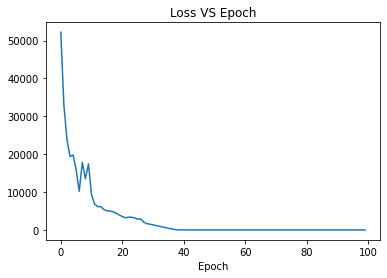

In [13]:
%%time

# Treinando

model_v1 = train_model(ANN_v1)


In [66]:
def print_accuracy(model, X_tr = X_train, y_tr = y_train, X_te = X_test, y_te = y_test):
    # Print accuracy
    predictions = torch.argmax(model(X_tr), dim=1)
    print('Train accuracy: ', (y_tr == predictions).sum() / len(predictions), '- únicos:', predictions.unique())
    
    predictions = torch.argmax(model(X_te), dim=1)
    print('Test accuracy: ', (y_te == predictions).sum() / len(predictions), '- únicos:', predictions.unique())

def output_hidden_prediction(model, columns = category_columns):
    hidden_predictions = model(torch.FloatTensor(df_hidden[columns].values))
    with open('datasets/hidden-results-' + type(model).__name__ + '.csv', 'w', newline='\n') as csvfile:
        spamwriter = csv.writer(csvfile, delimiter=';')
        spamwriter.writerow(['lithology'])
        spamwriter.writerows([[lithofacies_keys[x]] for x in torch.argmax(hidden_predictions, dim=1)])

print_accuracy(model_v1)
output_hidden_prediction(model_v1)

Train accuracy:  tensor(0.6162) - únicos: tensor([2])
Test accuracy:  tensor(0.6141) - únicos: tensor([2])


61% de acurácia é péssimo. Tendo em conta que todas as previsões foram 65000 [2] e esse y possui 720803 linhas de um todal de 1170511, ou seja, corresponde a 61,5%.

Há algo de errado com nosso modelo ou dados.

Epoch: 0 Loss: 152634.84375
Epoch: 10 Loss: 21402.060546875
Epoch: 20 Loss: 15793.341796875
Epoch: 30 Loss: 6495.537109375
Epoch: 40 Loss: 1595.271240234375
Epoch: 50 Loss: 2528.28515625
Epoch: 60 Loss: 1517.390380859375
Epoch: 70 Loss: 3517.215576171875
Epoch: 80 Loss: 1465.771728515625
Epoch: 90 Loss: 1583.4486083984375
Train accuracy:  tensor(0.1284) - únicos: tensor([1])
Test accuracy:  tensor(0.1292) - únicos: tensor([1])
Wall time: 3min 28s


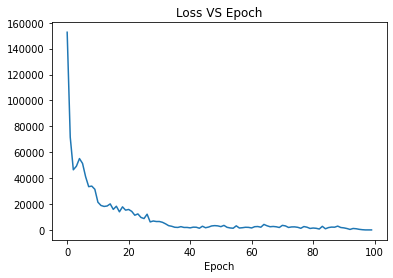

In [67]:
%%time

# Hipótese 1: Poucos nós. Fazendo com que features impactem demasiado em outras:
class ANN_v2(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(category_columns), out_features=len(category_columns))
        self.fc2 = nn.Linear(in_features=len(category_columns), out_features=len(category_columns))
        self.output = nn.Linear(in_features=len(category_columns), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

model_v2 = train_model(ANN_v2)


In [68]:
print_accuracy(model_v2)
output_hidden_prediction(model_v2)

Train accuracy:  tensor(0.1284) - únicos: tensor([1])
Test accuracy:  tensor(0.1292) - únicos: tensor([1])


Resultado hipótese 1: Baixou demais a mesma acurácia. Porém, já tem mais que uma previsão no resultado.

Epoch: 0 Loss: 595615.125
Epoch: 10 Loss: 139836.1875
Epoch: 20 Loss: 58839.984375
Epoch: 30 Loss: 23521.0703125
Epoch: 40 Loss: 15614.4482421875
Epoch: 50 Loss: 9249.0859375
Epoch: 60 Loss: 6072.529296875
Epoch: 70 Loss: 5660.20849609375
Epoch: 80 Loss: 3033.263427734375
Epoch: 90 Loss: 2006.84228515625


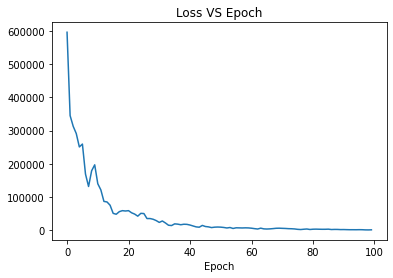

In [70]:
#Teste: Será qie usando somente a posição no solo, muda algo?
class ANN_v3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=3, out_features=10)
        self.fc2 = nn.Linear(in_features=10, out_features=20)
        self.output = nn.Linear(in_features=20, out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

test_columns = ['X_LOC', 'Y_LOC', 'Z_LOC']
(X_train_2, X_test_2, y_train_2, y_test_2) = separate_datasets(test_columns)
model_v3 = train_model(ANN_v3, X_train=X_train_2, y_train=y_train_2)

In [72]:
output_hidden_prediction(model_v3, test_columns)
print_accuracy(model_v3, X_tr=X_train_2, y_tr=y_train_2, X_te=X_test_2, y_te=y_test_2)

Train accuracy:  tensor(0.4984) - únicos: tensor([1, 2])
Test accuracy:  tensor(0.4974) - únicos: tensor([1, 2])


Só as colunas de posição não deram uma acurária boa. Seguimos:

Epoch: 0 Loss: 51190.6015625
Epoch: 10 Loss: 14709.439453125
Epoch: 20 Loss: 2.5585217475891113
Epoch: 30 Loss: 2.4784624576568604
Epoch: 40 Loss: 2.390354633331299
Epoch: 50 Loss: 2.302838087081909
Epoch: 60 Loss: 2.2183597087860107
Epoch: 70 Loss: 2.1377370357513428
Epoch: 80 Loss: 2.061311721801758
Epoch: 90 Loss: 1.9892832040786743
Epoch: 100 Loss: 1.9217945337295532
Epoch: 110 Loss: 1.8589445352554321
Epoch: 120 Loss: 1.800778865814209
Epoch: 130 Loss: 1.7472827434539795
Epoch: 140 Loss: 1.6983779668807983
Epoch: 150 Loss: 1.6539279222488403
Epoch: 160 Loss: 1.6137444972991943
Epoch: 170 Loss: 1.5775957107543945
Epoch: 180 Loss: 1.545219898223877
Epoch: 190 Loss: 1.516331672668457


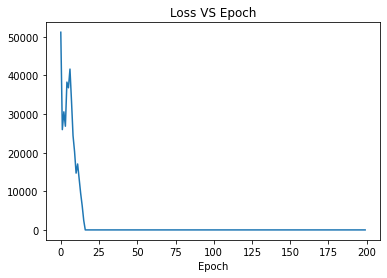

In [73]:
# Hipótese 2: Apenas dados com mais que 10% de dados presentes

hyp2_columns = ['DCAL', 'CALI', 'Delta_DTC', 'RMED', 'DTC', 'RDEP', 'Z_LOC', 'GROUP_encoded', 'Delta_DEPTH_MD', 'Delta_GR', 'FORMATION_encoded', 
    'DEPTH_MD', 'Normalized_GR', 'X_LOC', 'BS', 'GR', 'Y_LOC']

class ANN_v4(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(in_features=len(hyp2_columns), out_features=len(hyp2_columns))
        self.fc2 = nn.Linear(in_features=len(hyp2_columns), out_features=len(hyp2_columns))
        self.output = nn.Linear(in_features=len(hyp2_columns), out_features=len(lithofacies))
 
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.output(x)
        
        return x

# Treinando

(X_train_3, X_test_3, y_train_3, y_test_3) = separate_datasets(categories=hyp2_columns)

# Teste com mais épocas pq atingiu um ótimo local
model_v4 = train_model(ANN_v4, X_train=X_train_3, y_train=y_train_3, epochs=200)


In [75]:
output_hidden_prediction(model_v4, hyp2_columns)
print_accuracy(model_v4, X_tr=X_train_3, y_tr=y_train_3, X_te=X_test_3, y_te=y_test_3)

Train accuracy:  tensor(0.6162) - únicos: tensor([2])
Test accuracy:  tensor(0.6141) - únicos: tensor([2])


Curioso, apenas com as colunas com poucos dados ausentes deu a mesma acurácia da solução original. Vamos pra:

# Hipótese 3: Dividir o dataser e colocar quantidade de amostras equivalentes.
A concentração do 65000 parece realmente "enganar a rede". Vamos tentar equilibrar o treino.

# Hipótese 4: É necessário fazer uma análise de componentes principais.


In [ ]:
# Vamos tentar plotar algo
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=40, cmap=plt.cm.Spectral);

In [167]:
# Prevendo o hidden
#predictions = model_v2(torch.FloatTensor(df_hidden[category_columns].values))
